In [3]:
import pandas as pd

orders_df = pd.read_csv('./data/orders.csv')

print("First 5 rows of orders_df:")
print(orders_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nColumn information of orders_df:")
orders_df.info()

First 5 rows of orders_df:
| order_id   | user_id   | restaurant_id   | order_date   | total_amount   | restaurant_name                |
|:-----------|:----------|:----------------|:-------------|:---------------|:-------------------------------|
| 1          | 2508      | 450             | 18-02-2023   | 842.97         | New Foods Chinese              |
| 2          | 2693      | 309             | 18-01-2023   | 546.68         | Ruchi Curry House Multicuisine |
| 3          | 2084      | 107             | 15-07-2023   | 163.93         | Spice Kitchen Punjabi          |
| 4          | 319       | 224             | 04-10-2023   | 1155.97        | Darbar Kitchen Non-Veg         |
| 5          | 1064      | 293             | 25-12-2023   | 1321.91        | Royal Eatery South Indian      |

Column information of orders_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------     

In [4]:
users_df = pd.read_json('./data/users.json')

print("First 5 rows of users_df:")
print(users_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nColumn information of users_df:")
users_df.info()

First 5 rows of users_df:
| user_id   | name   | city      | membership   |
|:----------|:-------|:----------|:-------------|
| 1         | User_1 | Chennai   | Regular      |
| 2         | User_2 | Pune      | Gold         |
| 3         | User_3 | Bangalore | Gold         |
| 4         | User_4 | Bangalore | Regular      |
| 5         | User_5 | Pune      | Gold         |

Column information of users_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3000 non-null   int64 
 1   name        3000 non-null   object
 2   city        3000 non-null   object
 3   membership  3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [5]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Read the SQL script from the file
with open('./data/restaurants.sql', 'r') as f:
    sql_script = f.read()

# Execute the SQL script to create tables and insert data
conn.executescript(sql_script)

# Load the 'restaurants' table into a pandas DataFrame
restaurants_df = pd.read_sql_query("SELECT * FROM restaurants", conn)

# Close the database connection
conn.close()

print("First 5 rows of restaurants_df:")
print(restaurants_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nColumn information of restaurants_df:")
restaurants_df.info()

First 5 rows of restaurants_df:
| restaurant_id   | restaurant_name   | cuisine   | rating   |
|:----------------|:------------------|:----------|:---------|
| 1               | Restaurant_1      | Chinese   | 4.8      |
| 2               | Restaurant_2      | Indian    | 4.1      |
| 3               | Restaurant_3      | Mexican   | 4.3      |
| 4               | Restaurant_4      | Chinese   | 4.1      |
| 5               | Restaurant_5      | Chinese   | 4.8      |

Column information of restaurants_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_id    500 non-null    int64  
 1   restaurant_name  500 non-null    object 
 2   cuisine          500 non-null    object 
 3   rating           500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


 Perform left joins to combine the three datasets. Merge 'orders' with 'users' on 'user_id', and then merge the result with 'restaurants' on 'restaurant_id'. Ensure all orders are retained.

In [10]:
orders_users_df = pd.merge(orders_df, users_df, on='user_id', how='left')

final_df = pd.merge(orders_users_df, restaurants_df, on='restaurant_id', how='left')

print("First 5 rows of final_df:")
print(final_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nColumn information of final_df:")
final_df.info()

First 5 rows of final_df:
| order_id   | user_id   | restaurant_id   | order_date   | total_amount   | restaurant_name_x              | name      | city      | membership   | restaurant_name_y   | cuisine   | rating   |
|:-----------|:----------|:----------------|:-------------|:---------------|:-------------------------------|:----------|:----------|:-------------|:--------------------|:----------|:---------|
| 1          | 2508      | 450             | 18-02-2023   | 842.97         | New Foods Chinese              | User_2508 | Hyderabad | Regular      | Restaurant_450      | Mexican   | 3.2      |
| 2          | 2693      | 309             | 18-01-2023   | 546.68         | Ruchi Curry House Multicuisine | User_2693 | Pune      | Regular      | Restaurant_309      | Indian    | 4.5      |
| 3          | 2084      | 107             | 15-07-2023   | 163.93         | Spice Kitchen Punjabi          | User_2084 | Chennai   | Gold         | Restaurant_107      | Mexican   | 4        |
| 4 

Save the fully merged DataFrame, containing order, user, and restaurant information, to a new CSV file named 'final_food_delivery_dataset.csv'.

In [11]:
final_df.to_csv('final_food_delivery_dataset.csv', index=False)

print("DataFrame 'final_df' successfully saved to 'final_food_delivery_dataset.csv'.")

DataFrame 'final_df' successfully saved to 'final_food_delivery_dataset.csv'.


Conduct a comprehensive data analysis covering order trends over time, user behavior patterns, city-wise and cuisine-wise performance, membership impact (Gold vs. Regular), and revenue distribution and seasonality.

In [12]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'], format='%d-%m-%Y')

# Drop the redundant 'restaurant_name_x' column and rename 'restaurant_name_y'
final_df = final_df.drop(columns=['restaurant_name_x'])
final_df = final_df.rename(columns={'restaurant_name_y': 'restaurant_name'})

print("DataFrame after converting 'order_date' and renaming columns:")
print(final_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nColumn information after updates:")
final_df.info()

DataFrame after converting 'order_date' and renaming columns:
| order_id   | user_id   | restaurant_id   | order_date          | total_amount   | name      | city      | membership   | restaurant_name   | cuisine   | rating   |
|:-----------|:----------|:----------------|:--------------------|:---------------|:----------|:----------|:-------------|:------------------|:----------|:---------|
| 1          | 2508      | 450             | 2023-02-18 00:00:00 | 842.97         | User_2508 | Hyderabad | Regular      | Restaurant_450    | Mexican   | 3.2      |
| 2          | 2693      | 309             | 2023-01-18 00:00:00 | 546.68         | User_2693 | Pune      | Regular      | Restaurant_309    | Indian    | 4.5      |
| 3          | 2084      | 107             | 2023-07-15 00:00:00 | 163.93         | User_2084 | Chennai   | Gold         | Restaurant_107    | Mexican   | 4        |
| 4          | 319       | 224             | 2023-10-04 00:00:00 | 1155.97        | User_319  | Bangalore | 

In [13]:
# I will extract the 'month' and 'day_of_week' from the 'order_date' column and add them as new columns to final_df to enable detailed time-based analysis
final_df['order_month'] = final_df['order_date'].dt.month
final_df['order_day_of_week'] = final_df['order_date'].dt.day_name()

print("DataFrame after adding 'order_month' and 'order_day_of_week':")
print(final_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nColumn information after updates:")
final_df.info()

DataFrame after adding 'order_month' and 'order_day_of_week':
| order_id   | user_id   | restaurant_id   | order_date          | total_amount   | name      | city      | membership   | restaurant_name   | cuisine   | rating   | order_month   | order_day_of_week   |
|:-----------|:----------|:----------------|:--------------------|:---------------|:----------|:----------|:-------------|:------------------|:----------|:---------|:--------------|:--------------------|
| 1          | 2508      | 450             | 2023-02-18 00:00:00 | 842.97         | User_2508 | Hyderabad | Regular      | Restaurant_450    | Mexican   | 3.2      | 2             | Saturday            |
| 2          | 2693      | 309             | 2023-01-18 00:00:00 | 546.68         | User_2693 | Pune      | Regular      | Restaurant_309    | Indian    | 4.5      | 1             | Wednesday           |
| 3          | 2084      | 107             | 2023-07-15 00:00:00 | 163.93         | User_2084 | Chennai   | Gold         |

I will group the data by 'city' and 'cuisine' to calculate total orders, total revenue, and average order value for each combination, which helps in analyzing city-wise and cuisine-wise performance.

In [14]:
city_cuisine_performance = final_df.groupby(['city', 'cuisine']).agg(
    total_orders=('order_id', 'count'),
    total_revenue=('total_amount', 'sum'),
    average_order_value=('total_amount', 'mean')
).reset_index()

print("City and Cuisine Performance:")
print(city_cuisine_performance.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nSummary statistics for City and Cuisine Performance:")
print(city_cuisine_performance.describe().to_markdown(numalign="left", stralign="left"))

City and Cuisine Performance:
| city      | cuisine   | total_orders   | total_revenue   | average_order_value   |
|:----------|:----------|:---------------|:----------------|:----------------------|
| Bangalore | Chinese   | 656            | 525046          | 800.375               |
| Bangalore | Indian    | 697            | 543014          | 779.073               |
| Bangalore | Italian   | 699            | 567882          | 812.42                |
| Bangalore | Mexican   | 699            | 571005          | 816.888               |
| Chennai   | Chinese   | 600            | 491710          | 819.517               |

Summary statistics for City and Cuisine Performance:
|       | total_orders   | total_revenue   | average_order_value   |
|:------|:---------------|:----------------|:----------------------|
| count | 16             | 16              | 16                    |
| mean  | 625            | 500727          | 801.003               |
| std   | 48.7688        | 41474.3         | 

I will compare order patterns and revenue between 'Gold' and 'Regular' members by grouping the `final_df` by the 'membership' column and calculating total orders, total revenue, and average order value for each membership type.



In [15]:
membership_performance = final_df.groupby('membership').agg(
    total_orders=('order_id', 'count'),
    total_revenue=('total_amount', 'sum'),
    average_order_value=('total_amount', 'mean')
).reset_index()

print("Membership Performance (Gold vs. Regular):")
print(membership_performance.to_markdown(index=False, numalign="left", stralign="left"))

print("\nSummary statistics for Membership Performance:")
print(membership_performance.describe().to_markdown(numalign="left", stralign="left"))

Membership Performance (Gold vs. Regular):
| membership   | total_orders   | total_revenue   | average_order_value   |
|:-------------|:---------------|:----------------|:----------------------|
| Gold         | 4987           | 3.97536e+06     | 797.146               |
| Regular      | 5013           | 4.03626e+06     | 805.158               |

Summary statistics for Membership Performance:
|       | total_orders   | total_revenue   | average_order_value   |
|:------|:---------------|:----------------|:----------------------|
| count | 2              | 2               | 2                     |
| mean  | 5000           | 4.00581e+06     | 801.152               |
| std   | 18.3848        | 43058.8         | 5.66596               |
| min   | 4987           | 3.97536e+06     | 797.146               |
| 25%   | 4993.5         | 3.99059e+06     | 799.149               |
| 50%   | 5000           | 4.00581e+06     | 801.152               |
| 75%   | 5006.5         | 4.02104e+06     | 803.155 

I will create a boxplot of the 'total_amount' column to visually identify any potential outliers or anomalies in the revenue distribution, as requested in the subtask.



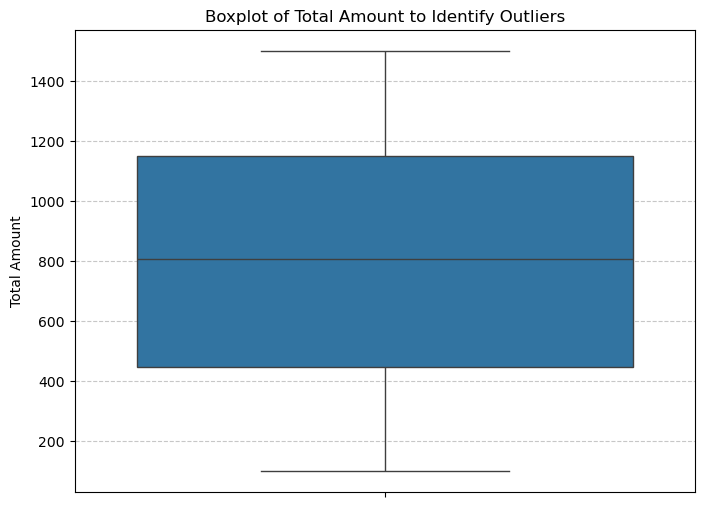

Boxplot generated to visualize outliers in 'total_amount'.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=final_df['total_amount'])
plt.title('Boxplot of Total Amount to Identify Outliers')
plt.ylabel('Total Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Boxplot generated to visualize outliers in 'total_amount'.")

I will display the first few rows of the updated `final_df` and its column information to verify all previous changes and confirm the DataFrame's structure.



In [17]:
print("First 5 rows of final_df after all updates:")
print(final_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nColumn information of final_df after all updates:")
final_df.info()

First 5 rows of final_df after all updates:
| order_id   | user_id   | restaurant_id   | order_date          | total_amount   | name      | city      | membership   | restaurant_name   | cuisine   | rating   | order_month   | order_day_of_week   |
|:-----------|:----------|:----------------|:--------------------|:---------------|:----------|:----------|:-------------|:------------------|:----------|:---------|:--------------|:--------------------|
| 1          | 2508      | 450             | 2023-02-18 00:00:00 | 842.97         | User_2508 | Hyderabad | Regular      | Restaurant_450    | Mexican   | 3.2      | 2             | Saturday            |
| 2          | 2693      | 309             | 2023-01-18 00:00:00 | 546.68         | User_2693 | Pune      | Regular      | Restaurant_309    | Indian    | 4.5      | 1             | Wednesday           |
| 3          | 2084      | 107             | 2023-07-15 00:00:00 | 163.93         | User_2084 | Chennai   | Gold         | Restaurant_107   

## Answer Analysis Questions




Which city has the highest total revenue (total_amount) from Gold members?

In [18]:
gold_member_revenue = final_df[final_df['membership'] == 'Gold'].groupby('city')['total_amount'].sum().reset_index()

highest_gold_revenue_city = gold_member_revenue.loc[gold_member_revenue['total_amount'].idxmax()]

print("City with the highest Gold member revenue:")
print(highest_gold_revenue_city.to_markdown(numalign="left", stralign="left"))

City with the highest Gold member revenue:
|              | 1          |
|:-------------|:-----------|
| city         | Chennai    |
| total_amount | 1080909.79 |


Which cuisine has the highest average order value across all orders?

In [19]:
highest_avg_order_cuisine = city_cuisine_performance.loc[city_cuisine_performance['average_order_value'].idxmax()]

print("Cuisine with the highest average order value:")
print(highest_avg_order_cuisine[['cuisine', 'average_order_value']].to_markdown(numalign="left", stralign="left"))

Cuisine with the highest average order value:
|                     | 11                |
|:--------------------|:------------------|
| cuisine             | Mexican           |
| average_order_value | 826.5876198347107 |


How many distinct users placed orders worth more than ₹1000 in total (sum of all their orders)?

In [21]:
user_behavior = final_df.groupby('user_id').agg(
    total_orders=('order_id', 'count'),
    total_spending=('total_amount', 'sum')
).reset_index()

print("User Behavior Analysis (first 5 rows):")
print(user_behavior.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nSummary statistics for User Behavior:")
print(user_behavior.describe().to_markdown(numalign="left", stralign="left"))

User Behavior Analysis (first 5 rows):
| user_id   | total_orders   | total_spending   |
|:----------|:---------------|:-----------------|
| 1         | 1              | 1289.66          |
| 2         | 10             | 7564.12          |
| 3         | 2              | 1839.51          |
| 4         | 4              | 3741.16          |
| 5         | 5              | 5742.88          |

Summary statistics for User Behavior:
|       | user_id   | total_orders   | total_spending   |
|:------|:----------|:---------------|:-----------------|
| count | 2883      | 2883           | 2883             |
| mean  | 1499.43   | 3.46861        | 2778.92          |
| std   | 865.769   | 1.79268        | 1627.28          |
| min   | 1         | 1              | 102.22           |
| 25%   | 747.5     | 2              | 1563.49          |
| 50%   | 1505      | 3              | 2514.92          |
| 75%   | 2246.5    | 4              | 3715.15          |
| max   | 3000      | 13             | 11556.5    

In [22]:
q3_spending = user_behavior['total_spending'].quantile(0.75)
high_value_users = user_behavior[user_behavior['total_spending'] > q3_spending].sort_values(by='total_spending', ascending=False)

print("Top 5 distinct users with high total order value (above 75th percentile):")
print(high_value_users.head(5).to_markdown(index=False, numalign="left", stralign="left"))

Top 5 distinct users with high total order value (above 75th percentile):
| user_id   | total_orders   | total_spending   |
|:----------|:---------------|:-----------------|
| 1515      | 12             | 11556.5          |
| 650       | 10             | 10747.4          |
| 496       | 11             | 9634.3           |
| 2586      | 10             | 9486.61          |
| 2615      | 9              | 9237.32          |


Which restaurant rating range generated the highest total revenue?

In [25]:
# Define rating bins and labels
bins = [1, 2, 3, 4, 5.1] # 5.1 to include 5.0
labels = ['1-2', '2-3', '3-4', '4-5']

# Create a new column for rating ranges
final_df['rating_range'] = pd.cut(final_df['rating'], bins=bins, labels=labels, right=False)

# Group by rating range and calculate total revenue
revenue_by_rating_range = final_df.groupby('rating_range')['total_amount'].sum().reset_index()

# Find the rating range with the highest total revenue
highest_revenue_rating_range = revenue_by_rating_range.loc[revenue_by_rating_range['total_amount'].idxmax()]

print("Restaurant rating range that generated the highest total revenue:")
print(highest_revenue_rating_range.to_markdown(numalign="left", stralign="left"))

Restaurant rating range that generated the highest total revenue:
|              | 3          |
|:-------------|:-----------|
| rating_range | 4-5        |
| total_amount | 4475618.43 |


C:\Users\Tcheugoue\AppData\Local\Temp\ipykernel_2840\3654260296.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_rating_range = final_df.groupby('rating_range')['total_amount'].sum().reset_index()


Among Gold members, which city has the highest average order value?

In [26]:
# Filter for Gold members
gold_members_df = final_df[final_df['membership'] == 'Gold']

# Group by city and calculate average order value for Gold members
gold_avg_order_by_city = gold_members_df.groupby('city')['total_amount'].mean().reset_index()

# Find the city with the highest average order value among Gold members
highest_avg_order_gold_city = gold_avg_order_by_city.loc[gold_avg_order_by_city['total_amount'].idxmax()]

print("City with the highest average order value among Gold members:")
print(highest_avg_order_gold_city.to_markdown(numalign="left", stralign="left"))

City with the highest average order value among Gold members:
|              | 1                 |
|:-------------|:------------------|
| city         | Chennai           |
| total_amount | 808.4590800299178 |


Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?

In [27]:
# Calculate the number of distinct restaurants per cuisine
distinct_restaurants_per_cuisine = final_df.groupby('cuisine')['restaurant_id'].nunique().reset_index(name='distinct_restaurants_count')

# Calculate total revenue per cuisine
total_revenue_per_cuisine = final_df.groupby('cuisine')['total_amount'].sum().reset_index(name='total_revenue')

# Merge the two dataframes
cuisine_stats = pd.merge(distinct_restaurants_per_cuisine, total_revenue_per_cuisine, on='cuisine')

# Sort by distinct restaurant count (ascending) and then by total revenue (descending)
significant_cuisine = cuisine_stats.sort_values(by=['distinct_restaurants_count', 'total_revenue'], ascending=[True, False])

print("Cuisine with the lowest number of distinct restaurants but still contributes significant revenue (sorted):")
print(significant_cuisine.head(5).to_markdown(index=False, numalign="left", stralign="left"))

Cuisine with the lowest number of distinct restaurants but still contributes significant revenue (sorted):
| cuisine   | distinct_restaurants_count   | total_revenue   |
|:----------|:-----------------------------|:----------------|
| Chinese   | 120                          | 1.9305e+06      |
| Italian   | 126                          | 2.0242e+06      |
| Indian    | 126                          | 1.97141e+06     |
| Mexican   | 128                          | 2.0855e+06      |


What percentage of total orders were placed by Gold members? (Rounded to nearest integer)

In [28]:
# Calculate total orders
total_orders_overall = membership_performance['total_orders'].sum()

# Get total orders for Gold members
gold_member_orders = membership_performance[membership_performance['membership'] == 'Gold']['total_orders'].iloc[0]

# Calculate percentage and round to nearest integer
percentage_gold_orders = round((gold_member_orders / total_orders_overall) * 100)

print(f"Percentage of total orders placed by Gold members: {percentage_gold_orders}%")

Percentage of total orders placed by Gold members: 50%


Which restaurant has the highest average order value but less than 20 total orders?

In [29]:
# Group by restaurant and calculate average order value and total orders
restaurant_stats = final_df.groupby('restaurant_name').agg(
    avg_order_value=('total_amount', 'mean'),
    total_orders=('order_id', 'count')
).reset_index()

# Filter for restaurants with less than 20 total orders
filtered_restaurants = restaurant_stats[restaurant_stats['total_orders'] < 20]

# Find the restaurant with the highest average order value among the filtered ones
highest_avg_order_low_orders = filtered_restaurants.loc[filtered_restaurants['avg_order_value'].idxmax()]

print("Restaurant with the highest average order value but less than 20 total orders:")
print(highest_avg_order_low_orders.to_markdown(numalign="left", stralign="left"))

Restaurant with the highest average order value but less than 20 total orders:
|                 | 216                |
|:----------------|:-------------------|
| restaurant_name | Restaurant_294     |
| avg_order_value | 1040.2223076923076 |
| total_orders    | 13                 |


 Which combination contributes the highest revenue?

In [30]:
# Find the city-cuisine combination with the highest total revenue
highest_revenue_combination = city_cuisine_performance.loc[city_cuisine_performance['total_revenue'].idxmax()]

print("Combination (city-cuisine) that contributes the highest revenue:")
print(highest_revenue_combination[['city', 'cuisine', 'total_revenue']].to_markdown(numalign="left", stralign="left"))

Combination (city-cuisine) that contributes the highest revenue:
|               | 3         |
|:--------------|:----------|
| city          | Bangalore |
| cuisine       | Mexican   |
| total_revenue | 571004.61 |


In [32]:
# Group by membership and cuisine and calculate total revenue
membership_cuisine_performance = final_df.groupby(['membership', 'cuisine'])['total_amount'].sum().reset_index()

# Find the membership-cuisine combination with the highest total revenue
highest_revenue_combination_mc = membership_cuisine_performance.loc[membership_cuisine_performance['total_amount'].idxmax()]

print("Combination (membership-cuisine) that contributes the highest revenue:")
print(highest_revenue_combination_mc.to_markdown(numalign="left", stralign="left"))

Combination (membership-cuisine) that contributes the highest revenue:
|              | 7         |
|:-------------|:----------|
| membership   | Regular   |
| cuisine      | Mexican   |
| total_amount | 1072943.3 |


During which quarter of the year is the total revenue highest?

In [31]:
# Extract the quarter from the order_date
final_df['order_quarter'] = final_df['order_date'].dt.quarter

# Group by quarter and calculate total revenue
revenue_by_quarter = final_df.groupby('order_quarter')['total_amount'].sum().reset_index()

# Find the quarter with the highest total revenue
highest_revenue_quarter = revenue_by_quarter.loc[revenue_by_quarter['total_amount'].idxmax()]

print("Quarter of the year with the highest total revenue:")
print(highest_revenue_quarter.to_markdown(numalign="left", stralign="left"))

Quarter of the year with the highest total revenue:
|               | 2           |
|:--------------|:------------|
| order_quarter | 3           |
| total_amount  | 2.03739e+06 |


How many total orders were placed by users with Gold membership?

In [37]:
gold_orders_count = final_df[final_df['membership'] == 'Gold'].shape[0]
print(f"Total orders placed by Gold members: {gold_orders_count}")

Total orders placed by Gold members: 4987


How many distinct users placed at least one order?

In [38]:
distinct_users_count = final_df['user_id'].nunique()
print(f"Number of distinct users who placed at least one order: {distinct_users_count}")

Number of distinct users who placed at least one order: 2883


What is the average order value (rounded to 2 decimals) for Gold members?

In [39]:
gold_avg_order_value = round(final_df[final_df['membership'] == 'Gold']['total_amount'].mean(), 2)
print(f"Average order value for Gold members: {gold_avg_order_value}")

Average order value for Gold members: 797.15


How many orders were placed for restaurants with rating ≥ 4.5?

In [40]:
high_rating_restaurants_orders = final_df[final_df['rating'] >= 4.5].shape[0]
print(f"Total orders for restaurants with rating \u2265 4.5: {high_rating_restaurants_orders}")

Total orders for restaurants with rating ≥ 4.5: 3374


 How many orders were placed in the top revenue city among Gold members only?

In [41]:
# Assuming 'Chennai' is the top revenue city among Gold members from previous analysis
top_gold_city = 'Chennai'
orders_in_top_gold_city = final_df[(final_df['membership'] == 'Gold') & (final_df['city'] == top_gold_city)].shape[0]
print(f"Total orders in the top revenue city among Gold members ({{top_gold_city}}): {orders_in_top_gold_city}")

Total orders in the top revenue city among Gold members ({top_gold_city}): 1337


## Summary:
## Q&A
### 1. Which city has the highest total revenue (total_amount) from Gold members?
Chennai, with a total Gold member revenue of 1 080 909,79 ₹.
### 2. Which cuisine has the highest average order value across all orders?
Mexican cuisine, with an average order value of 826,59 ₹.
### 3. How many distinct users placed orders worth more than ₹1000 in total (sum of all their orders)?
There are 721 distinct users who placed orders worth more than 1000 ₹ in total.
### 4. Which restaurant rating range generated the highest total revenue?
The restaurant rating range of 4-5 stars, generating 4 475 618,43 ₹ in total revenue.
### 5. Among Gold members, which city has the highest average order value?
Chennai, with an average order value of 808,46 ₹ among Gold members.
### 6. Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?
Chinese cuisine, with 120 distinct restaurants contributing 1 930 504,65 ₹ in revenue.
### 7. What percentage of total orders were placed by Gold members? (Rounded to nearest integer)
50% of total orders were placed by Gold members.
### 8. Which restaurant has the highest average order value but less than 20 total orders?
Restaurant_294, with an average order value of 1040,22 ₹ from 13 total orders.
### 9. Which combination contributes the highest revenue?
The Bangalore - Mexican combination, contributing 571 004,61 ₹ in revenue.
### 12. During which quarter of the year is the total revenue highest?
The 3rd quarter of the year, with a total revenue of 2 037 385,10 ₹.